# <span style = "color: green;">Bank Customer Churn.</span>

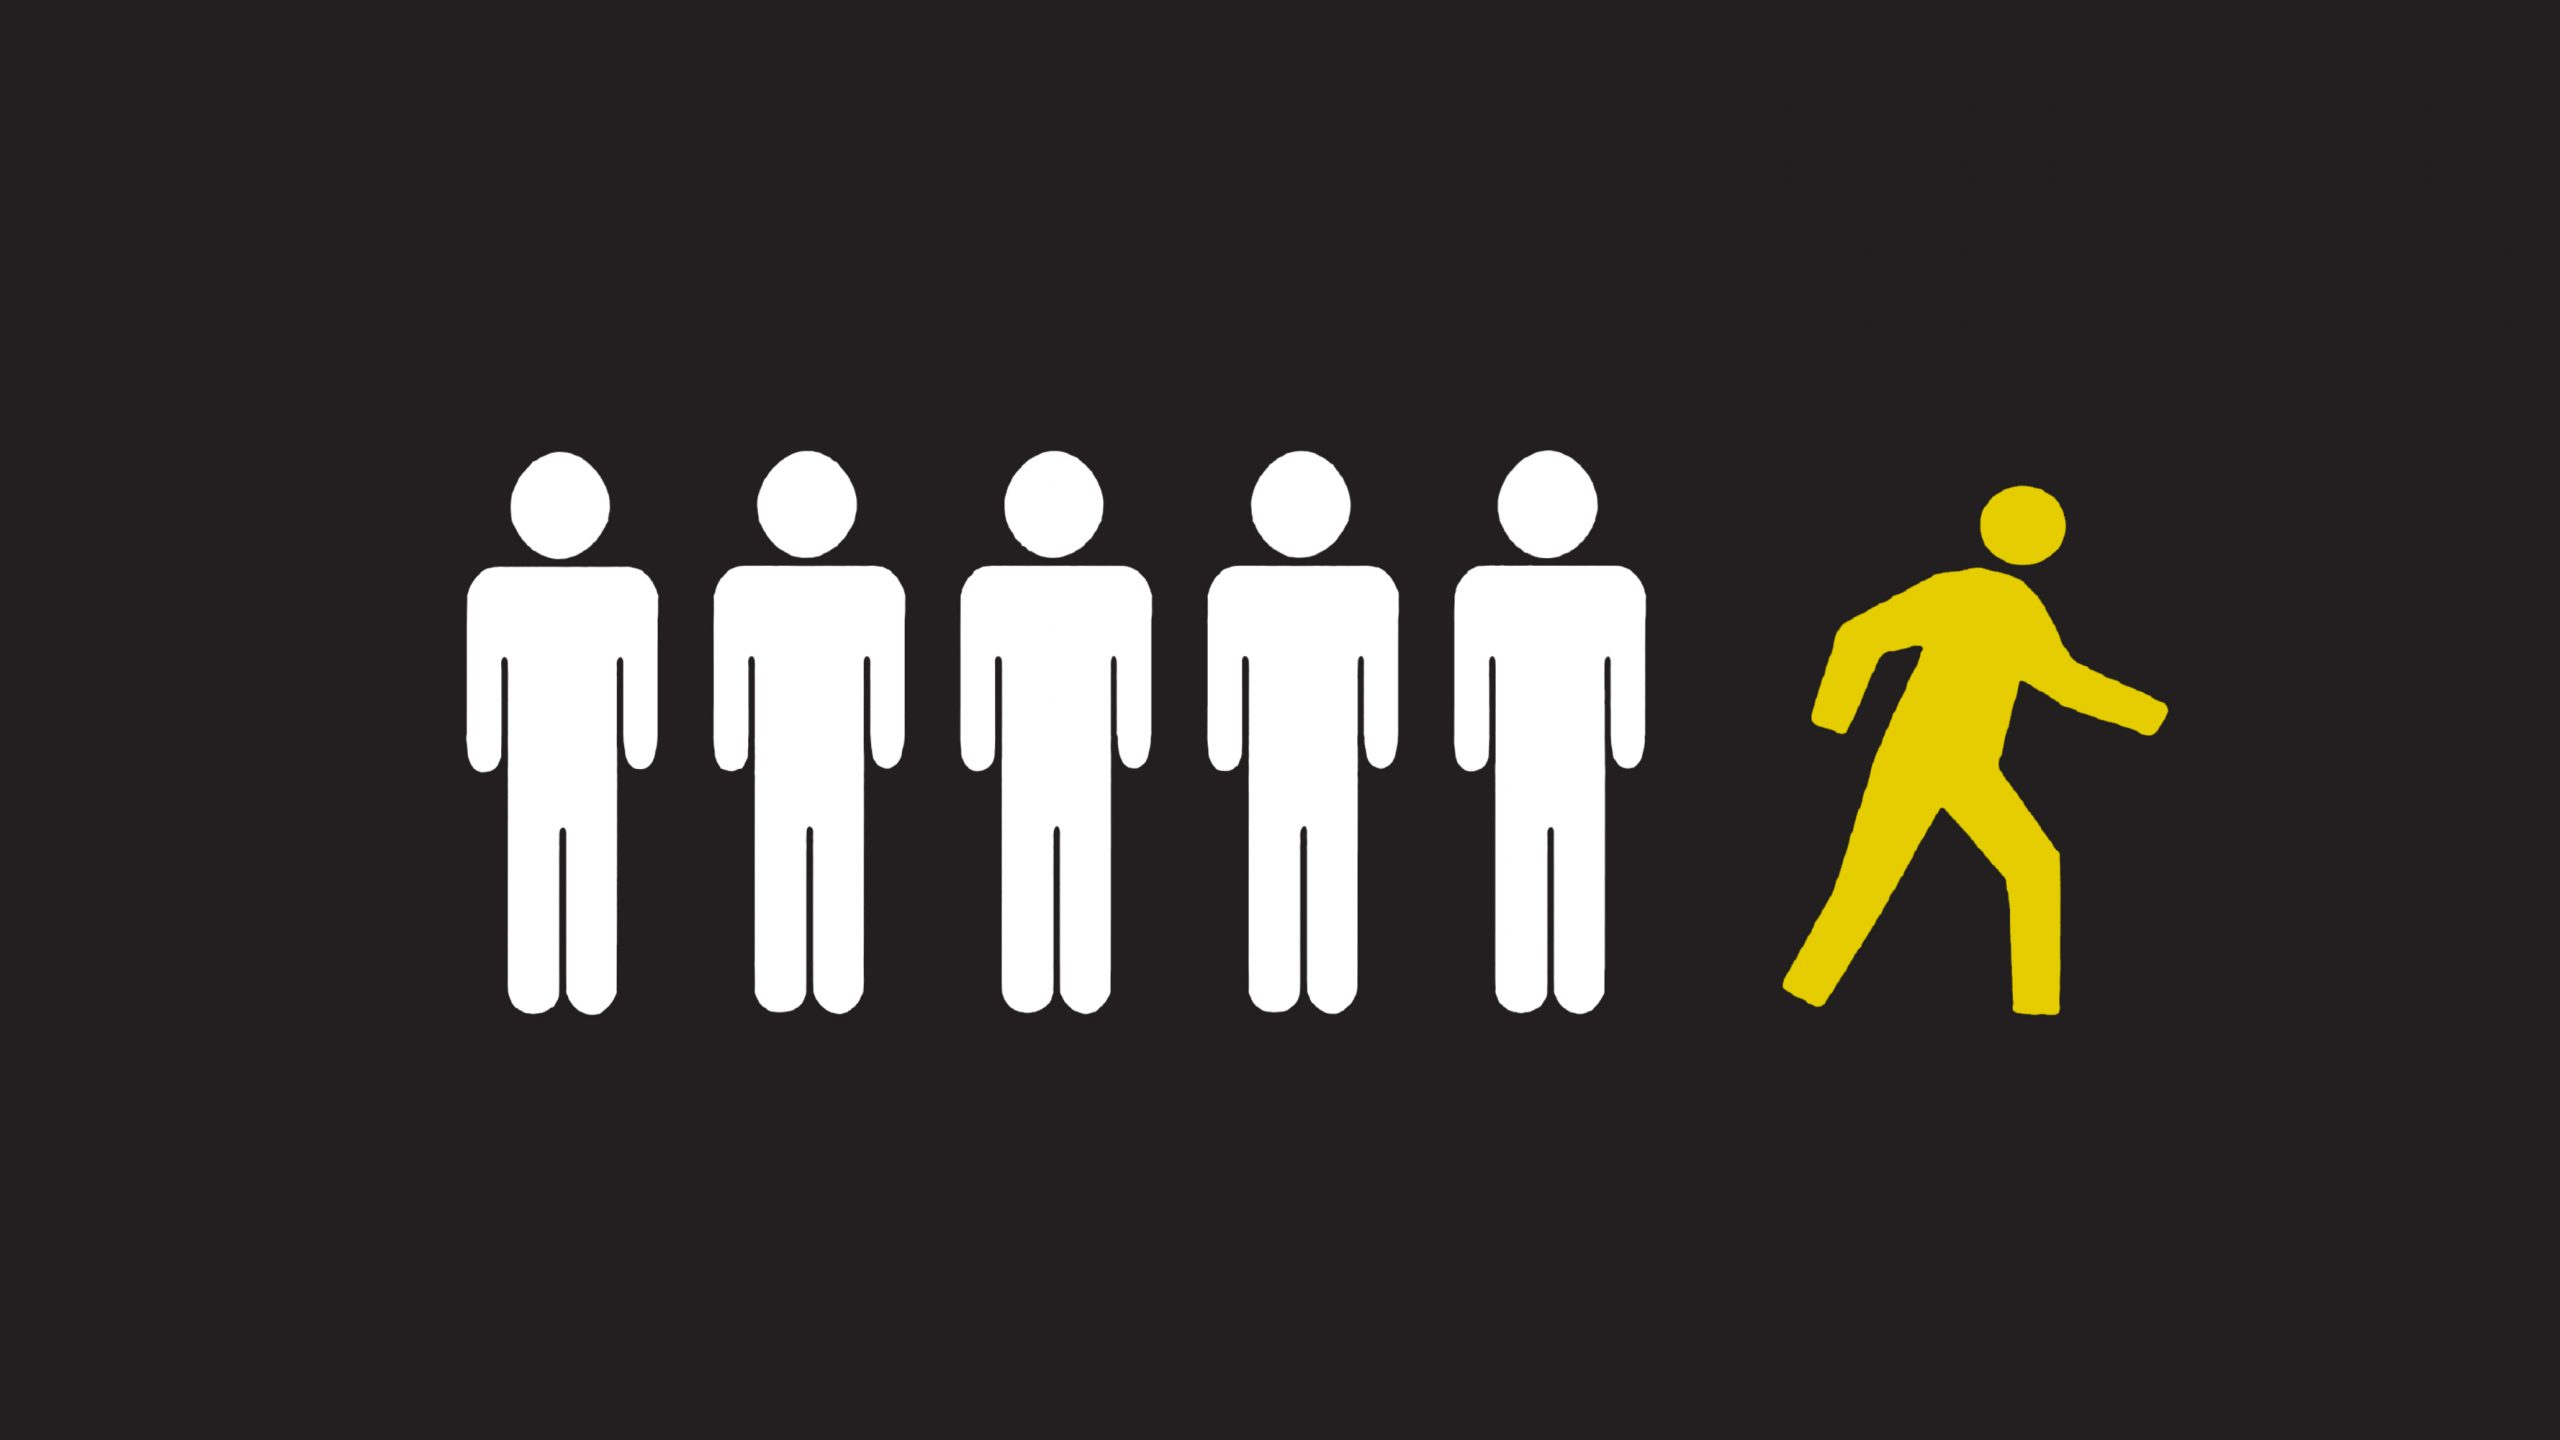

This dataset shows people churns or not churns, our goal here is to predict which customers will churn and reaon of churn.

# <span style = "color: blue;"> Importing Libraries.</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Customer-Churn-Records.csv')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df.describe()                     # is show static values count

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [6]:
# Total size of data

df.size

180000

In [7]:
# how many rows and columns in the data

df.shape

(10000, 18)

In [8]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [9]:
# find the null value

df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [10]:
# Show all columns 

df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [11]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [13]:
df['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [14]:
df['Complain'].unique()

array([1, 0], dtype=int64)

In [15]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

<span style = "color: green;">Verifying the correlation between our variales.</span>

<AxesSubplot:>

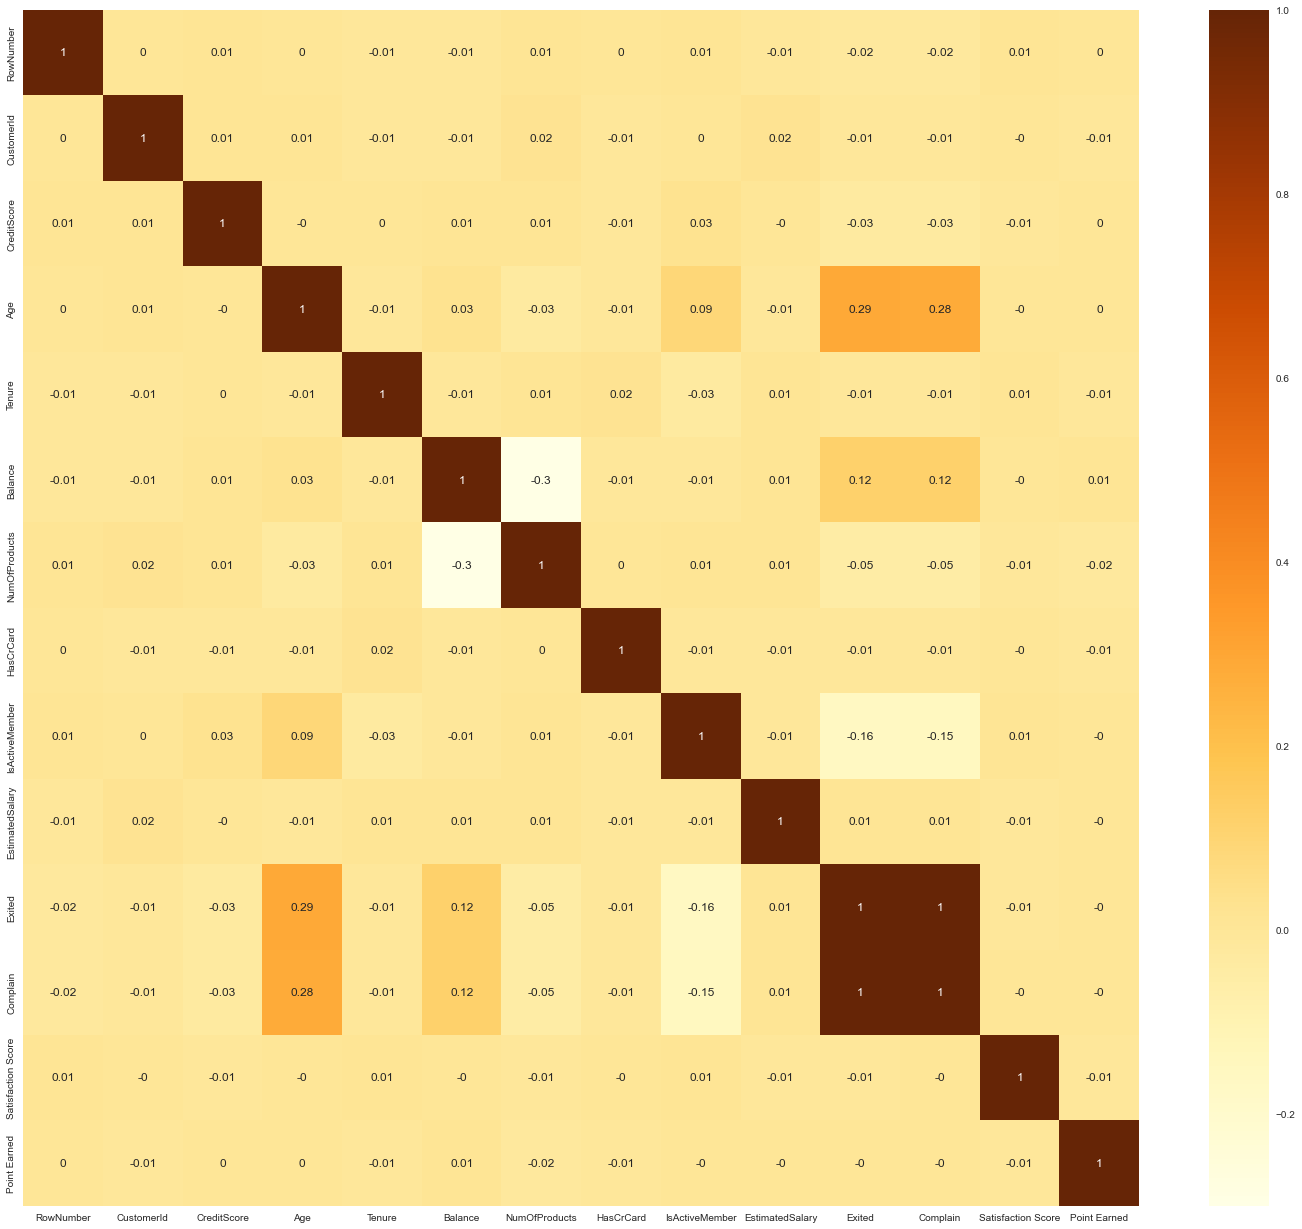

In [16]:
corr = df.corr().round(2)
plt.figure(figsize = (25, 22))
sns.heatmap(corr, annot= True, cmap= 'YlOrBr')


we can see that we have 100% correlation between the target variables and the complain variable, so let's eliminate the complain variable.

In [17]:
# drop Complain coloumn

# df = df.drop('Complain', axis = 1)

<span style = 'color:green;'> Categorical Variables</spam>

<AxesSubplot:title={'center':'Card Type'}, xlabel='Card Type', ylabel='count'>

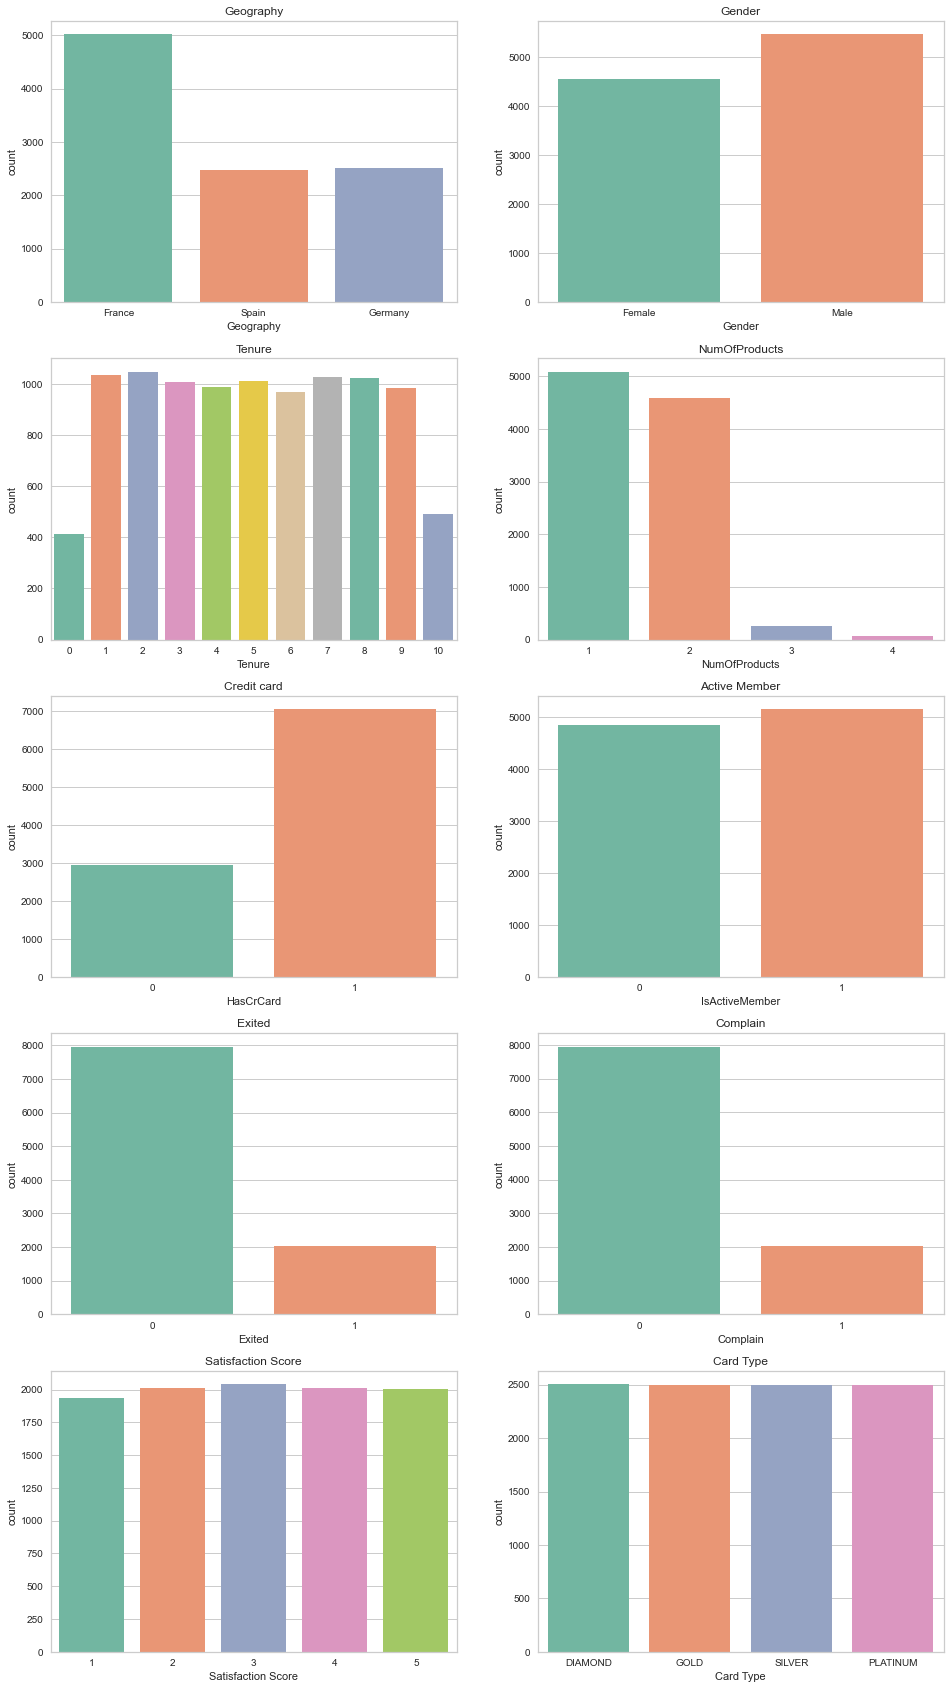

In [18]:
plt.figure(figsize = (16, 30))

plt.subplot(5, 2, 1)
plt.gca().set_title('Geography')
sns.countplot(x = 'Geography', palette= 'Set2', data = df)

plt.subplot(5, 2, 2)
plt.gca().set_title('Gender')
sns.countplot(x = 'Gender', palette= 'Set2', data = df)

plt.subplot(5, 2, 3)
plt.gca().set_title('Tenure')
sns.countplot(x = 'Tenure', palette= 'Set2', data = df)

plt.subplot(5, 2, 4)
plt.gca().set_title('NumOfProducts')
sns.countplot(x = 'NumOfProducts', palette= 'Set2', data = df)

plt.subplot(5, 2, 5)
plt.gca().set_title('Credit card')
sns.countplot(x = 'HasCrCard', palette= 'Set2', data = df)

plt.subplot(5, 2, 6)
plt.gca().set_title('Active Member')
sns.countplot(x = 'IsActiveMember', palette= 'Set2', data = df)

plt.subplot(5, 2, 7)
plt.gca().set_title('Exited')
sns.countplot(x = 'Exited', palette= 'Set2', data = df)

plt.subplot(5, 2, 8)
plt.gca().set_title('Complain')
sns.countplot(x = 'Complain', palette= 'Set2', data = df)

plt.subplot(5, 2, 9)
plt.gca().set_title('Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', palette= 'Set2', data = df)

plt.subplot(5, 2, 10)
plt.gca().set_title('Card Type')
sns.countplot(x = 'Card Type', palette= 'Set2', data = df)

<span style ='color: green;'> Continuous Variables.</span>

<AxesSubplot:xlabel='Point Earned', ylabel='Count'>

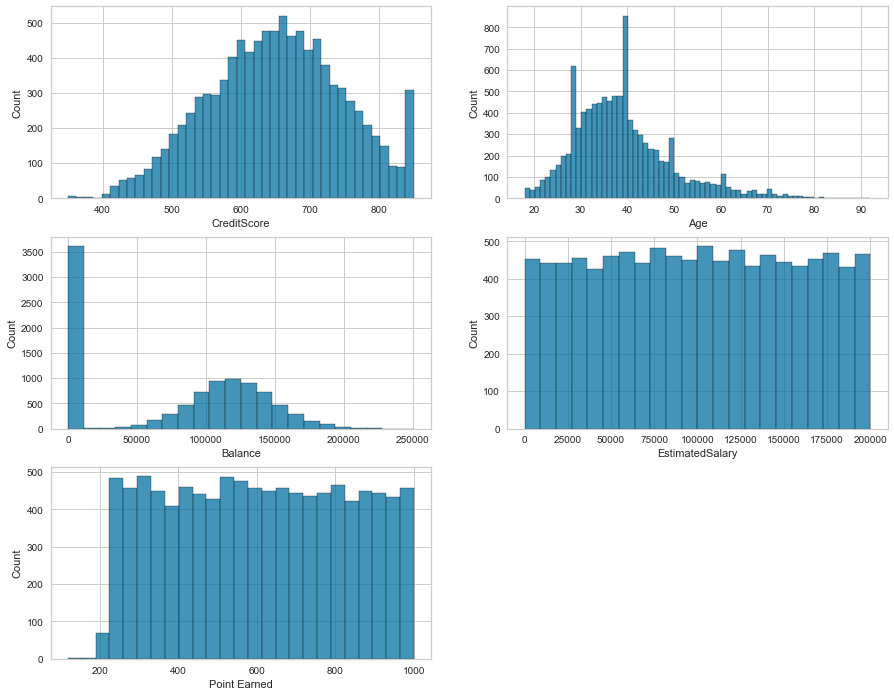

In [19]:
plt.figure(figsize= (15, 12))

plt.subplot(3, 2, 1)
sns.histplot(x = df['CreditScore'], kde= False)

plt.subplot(3, 2, 2)
sns.histplot(x = df['Age'], kde= False)

plt.subplot(3, 2, 3)
sns.histplot(x = df['Balance'], kde= False)

plt.subplot(3, 2, 4)
sns.histplot(x = df['EstimatedSalary'], kde= False)

plt.subplot(3, 2, 5)
sns.histplot(x = df['Point Earned'], kde= False)

 Find the outliers in our continuous variables using boxplot

<AxesSubplot:title={'center':'Credit Score'}, xlabel='CreditScore'>

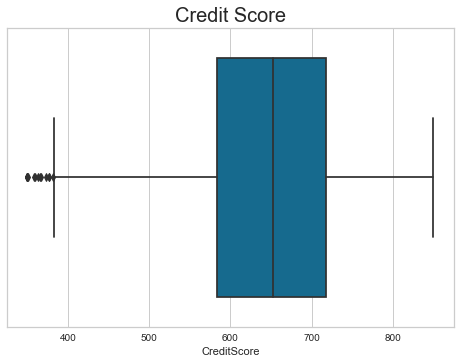

In [20]:
plt.title("Credit Score", fontdict= {'fontsize': 20})
sns.boxplot(x = df['CreditScore'])

<AxesSubplot:title={'center':'Age'}, xlabel='Age'>

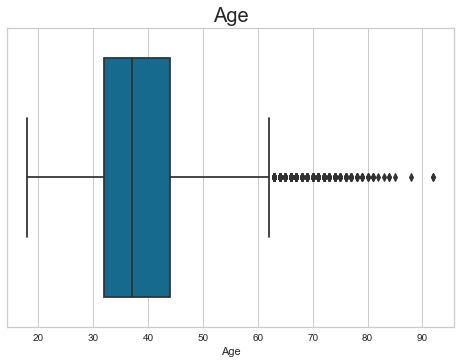

In [21]:
plt.title("Age", fontdict= {'fontsize': 20})
sns.boxplot(x = df['Age'])

<AxesSubplot:title={'center':'Balance'}, xlabel='Balance'>

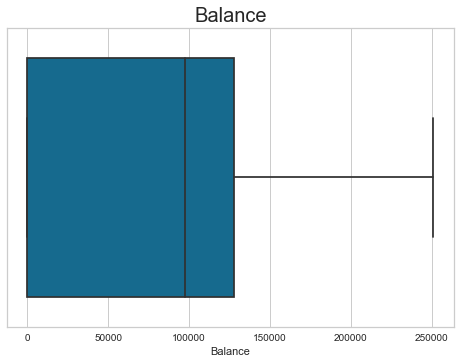

In [22]:
plt.title("Balance", fontdict= {'fontsize': 20})
sns.boxplot(x= df['Balance'])

<AxesSubplot:title={'center':'Estimated Salary'}, xlabel='EstimatedSalary'>

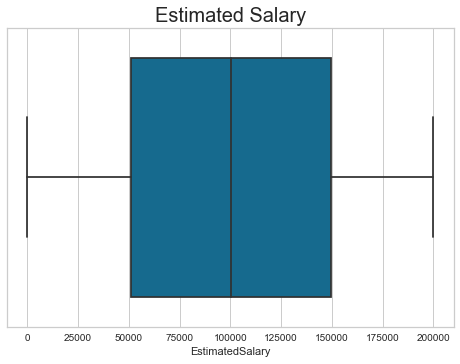

In [23]:
plt.title("Estimated Salary", fontdict= {'fontsize': 20})
sns.boxplot(x= df['EstimatedSalary'])

<AxesSubplot:title={'center':'Point Earned'}, xlabel='Point Earned'>

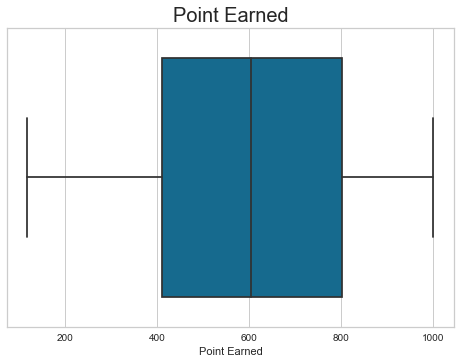

In [24]:
plt.title("Point Earned", fontdict= {'fontsize': 20})
sns.boxplot(x= df['Point Earned'])

<AxesSubplot:title={'center':'Card Type'}, xlabel='Card Type', ylabel='count'>

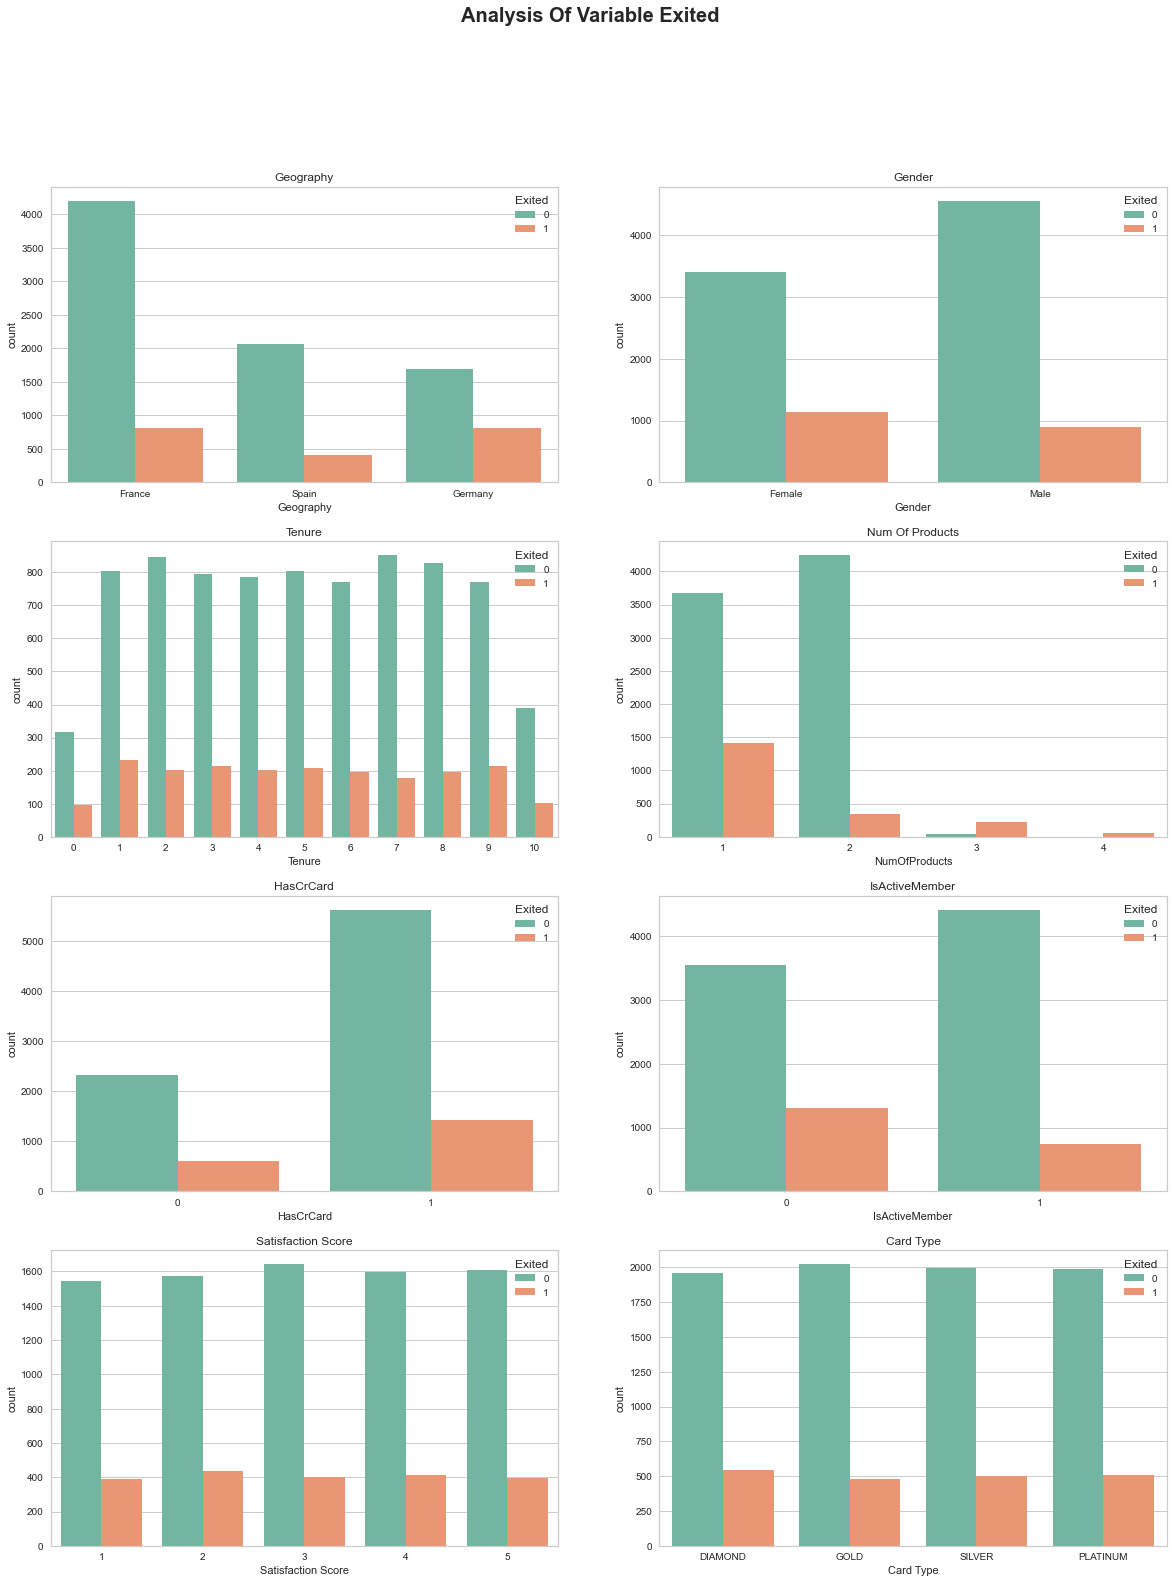

In [25]:
#Analysis of Variable Exited

plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Exited",fontweight="bold", fontsize=20)

plt.subplot(4, 2, 1)
plt.gca().set_title('Geography')
sns.countplot(x = 'Geography', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 2)
plt.gca().set_title('Gender')
sns.countplot(x = 'Gender', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 3)
plt.gca().set_title('Tenure')
sns.countplot(x = 'Tenure', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 4)
plt.gca().set_title('Num Of Products')
sns.countplot(x = 'NumOfProducts', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 5)
plt.gca().set_title('HasCrCard')
sns.countplot(x = 'HasCrCard', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 6)
plt.gca().set_title('IsActiveMember')
sns.countplot(x = 'IsActiveMember', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 7)
plt.gca().set_title('Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 8)
plt.gca().set_title('Card Type')
sns.countplot(x = 'Card Type', hue = 'Exited', palette = 'Set2', data = df)

<AxesSubplot:xlabel='Exited', ylabel='Point Earned'>

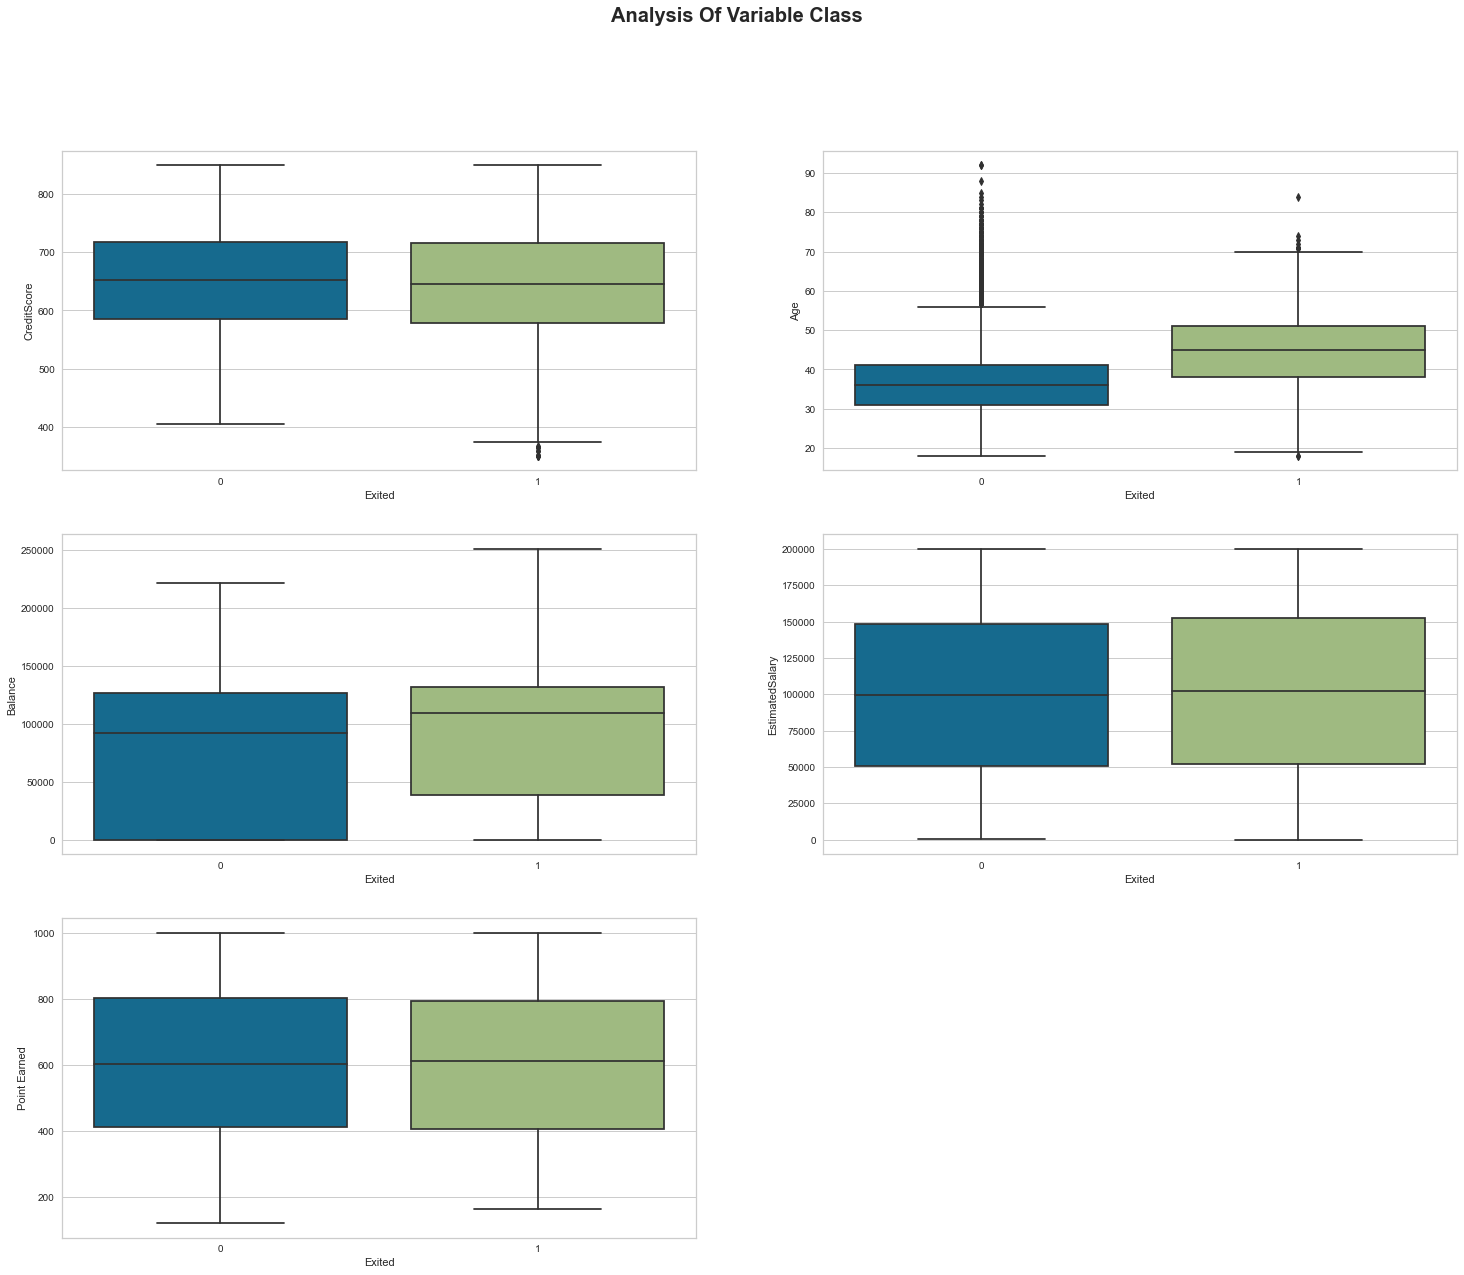

In [26]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Class",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="Exited", y="CreditScore", data=df)

plt.subplot(3,2,2)
sns.boxplot(x="Exited", y="Age", data=df)

plt.subplot(3,2,3)
sns.boxplot(x="Exited", y="Balance", data=df)

plt.subplot(3,2,4)
sns.boxplot(x="Exited", y="EstimatedSalary", data=df)

plt.subplot(3,2,5)
sns.boxplot(x="Exited", y="Point Earned", data=df)

# <span style = 'color: blue;'> Model Building</span>

<span style = 'color: green;'>drop Row number, customerID and Surname</span>

In [27]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

<span style = 'color: green;'>One Hot Label Encoder</span>

• Here we are going to use the OneHotLabeL Encoder to transform our categorical variables into continues variables.

In [28]:
hot = pd.get_dummies(df[['Geography', 'Gender', 'Card Type']])

In [29]:
df = pd.concat([df, hot], axis = 1)
df = df.drop(['Geography', 'Gender', 'Card Type'], axis = 1)

<span style = 'color: green;'>Separating into features variables and target variable.</span>

In [30]:
X = df.drop('Exited', axis = 1)
X = X.values
y = df['Exited']

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

In [33]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

<span style = 'color: green;'>Navie Bayes</span>

• Here we will use the Navi Bayes Model, we will test Gaussian model, using our Data.

In [34]:
from sklearn.naive_bayes import GaussianNB
navie_bayes = GaussianNB()
navie_bayes.fit(X_train, y_train)
previsoes = navie_bayes.predict(X_test)

0.9986666666666667

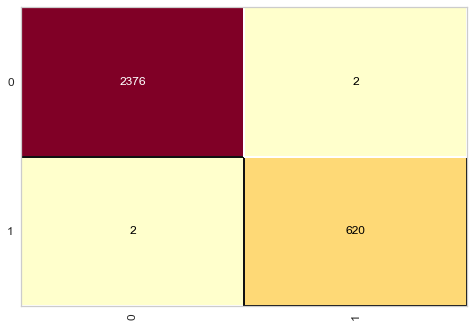

In [35]:
cm = ConfusionMatrix(navie_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [36]:
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2378
           1       1.00      1.00      1.00       622

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [37]:
score_navie_gaussian = 0.9986666666666667

<span style = 'color: green;'>Decision tree Algorithm</span>

In [38]:
parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = DecisionTreeClassifier()
gridDecisionTree = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridDecisionTree.fit(X_train, y_train)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  4
Max Nvl:  6
Algorithm:  entropy
Score:  0.9991046165864882


0.9983333333333333

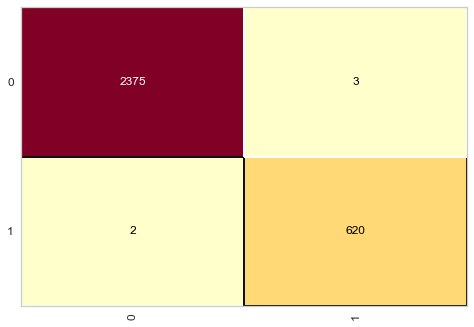

In [39]:
decision_tree = DecisionTreeClassifier(criterion= 'gini', min_samples_split= 2, max_depth= 6, random_state= 0)

decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [40]:
classification_decision = (classification_report(y_test, previsoes))
print(classification_decision)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2378
           1       1.00      1.00      1.00       622

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [41]:
score_tree = 0.9983333333333333

<span style = 'color: green;'>Logistic Regression Algorithm</span>

0.9986666666666667

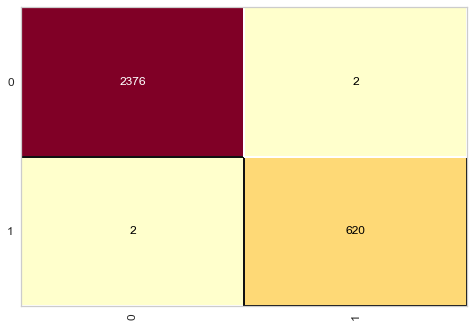

In [46]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 1, max_iter=1000)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)

cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [47]:
logistic_normal = (classification_report(y_test, previsoes))
print(logistic_normal)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2378
           1       1.00      1.00      1.00       622

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [48]:
logistic_normal = 0.6576666666666666

In [42]:
columns = df.drop('Exited', axis = 1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp


Complain              0.996710
Balance               0.001172
Point Earned          0.001011
EstimatedSalary       0.000358
CreditScore           0.000344
Tenure                0.000337
NumOfProducts         0.000028
Geography_Spain       0.000018
Card Type_PLATINUM    0.000012
Age                   0.000010
HasCrCard             0.000000
IsActiveMember        0.000000
Card Type_SILVER      0.000000
Geography_France      0.000000
Geography_Germany     0.000000
Gender_Female         0.000000
Gender_Male           0.000000
Card Type_DIAMOND     0.000000
Card Type_GOLD        0.000000
Satisfaction Score    0.000000
dtype: float64

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = X
target = y

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(columns),columns = ['Chi Squared Score']) 

featureScores.sort_values(by = 'Chi Squared Score', ascending = False).round(2)

,Chi Squared Score
Balance,7156628.86
EstimatedSalary,51542.37
Complain,7887.61
Age,2299.99
Geography_Germany,225.01
IsActiveMember,118.54
CreditScore,102.91
Gender_Female,61.62
Geography_France,54.64
Gender_Male,51.30


In [51]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':score_navie_gaussian}

Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_tree}

Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':logistic_normal}


resume = pd.DataFrame({'Naive Bayes':pd.Series(Naive_dict_v1),
                       'Decision Tree':pd.Series(Decision_dict),
                      'Logistic Regression':pd.Series(Logistic_dict_v1)})
resume


,Naive Bayes,Decision Tree,Logistic Regression
Model,Naive Bayes,Decision Tree,Logistic Regression
Scaling,Normal Data,Normal Data,Normal Data
Type,Gaussian,Gini,-
Precision,0.998667,0.998333,0.657667


# <span style = 'color: blue;'> Conclusion</span>

• The goal of this project was to predict customer churn within a bank and identify key factors influencing customer retention. After thorough exploratory data analysis, we observed significant patterns in features like age, credit score, and customer satisfaction, all of which showed correlations with churn behavior. By examining demographic and financial attributes, we identified that factors such as customer satisfaction score, number of products, and whether the customer is an active member or holds a credit card strongly impacted churn likelihood.

• Through model development and evaluation, we employed techniques such as Decision Tree classification, which allowed us to achieve a reliable level of accuracy.

• Ultimately, this model not only helps predict churn but also offers actionable insights that the bank could use to improve customer satisfaction and retention strategies. In future iterations, integrating additional external data sources or advanced machine learning techniques like ensemble methods could potentially enhance prediction accuracy and refine feature importance. This project, therefore, provides a strong foundation for data-driven customer retention strategies within the banking sector.